# SVM

Ideja je pronaći pravu (ili u više dimenzija hiperravan tj. ravan u vise dimenzija) koja razdvaja podatke iz dve klase. Takvih razdvajajućih hiperravni ima više, treba izabrati najbolju - onu koja se nalazi na bezbednom rastojanju i od jedne, i od druge klase. Ako podaci nisu baš linearno razdvojivi, koristimo meku marginu - dopuštamo neke instance sa pogrešne strane granice. Ako podaci nisu uopšte linearno razdvojivi, koristimo kernele.

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [3]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [13]:
params = [
            {
                'kernel': ['linear'],
                'C': [0.01, 0.1, 1, 10],
            },
            {
                'kernel': ['rbf'],
                'C': [0.01, 0.1, 1, 10],
                'gamma': [0.01, 0.1, 1, 10],
            },
         ]

In [14]:
gs = GridSearchCV(SVC(), params, scoring='accuracy', cv=5, verbose=5)

In [15]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.941 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.965 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.965 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

,estimator,SVC()
,param_grid,"[{'C': [0.01, 0.1, ...], 'kernel': ['linear']}, {'C': [0.01, 0.1, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['rbf']}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,5
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [16]:
gs.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [17]:
gs.best_score_

np.float64(0.9765253077975377)

In [18]:
gs.best_estimator_.support_vectors_

array([[ 0.74606212,  0.20369979,  0.64194025, ..., -0.3987641 ,
         2.70296104, -0.41916107],
       [-0.1698248 ,  0.34325827, -0.13217554, ...,  1.66204896,
        -0.16095555,  1.22929655],
       [-0.18123772,  0.51432995, -0.22407592, ..., -0.04400592,
         0.12543611, -0.67387901],
       ...,
       [-0.16126511, -0.09117377, -0.14459451, ...,  0.46364217,
        -0.37689792, -0.38551908],
       [-0.31248632,  0.01236962, -0.29279422, ..., -0.23188037,
         1.04740284,  0.40480074],
       [ 0.46644555, -1.20764158,  0.43081776, ...,  0.34603455,
        -0.28960207, -0.71392901]], shape=(97, 30))

In [19]:
y_pred = gs.best_estimator_.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [21]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.958041958041958
[[48  5]
 [ 1 89]]
0.967391304347826


# Kerneli

SVM je trazio hipperavan koja najbolje razdvaja klase tj. maksimizuje marignu (rastojanje izmedju hiperravni i najblizih tacaka iz obe klase. Te najblize tacke se zovu **support vectors** i one odredjuju granicu. Ostali podaci nisu toliko bitni.

Ako su podaci linearno razdvojivi, SVM je elegantan i precizan. Ako nisu tu dolaze **kerneli**

U stvarnom svetu podaci retko leze tako da se mogu razdovojiji ravnom linijom (ili hiperravni) - npr. ako tacke leze u obliku kruga, crvene unutra i plave spolja to nijedna prava linija ne moze razdovojiti. Da bi ovo mogli da razdovijimo SVM transformise podatke u visedimenzioni prostor gde ih je lakse odvojiti, kako to uraditi efikasno? -> Tu ulaze kerneli.

**Kernel** je funkcija kora racuna slicnost (ili skalarni proizvod) izmedju podataka u novom prostoru, bez da ikad eksplicitno transformise podatke u taj prostor.

# Kako se sve uklapa

- **PCA**: koristiš da smanjiš dimenzionalnost, ubrzaš računanje i eliminišeš šum.
- **SVM**: koristiš da napraviš model koji razdvaja podatke u smanjenom prostoru.
- **Kerneli**: dodaju moć da se nelinearni podaci razdvoje kao da su linearni – ali u višem prostoru.

Praktičan tok:
- Imaš skup podataka (možda 1000D).
- Primeniš PCA → dobiješ recimo 50D prostor.
- Pokreneš SVM sa RBF kernelom → model se lepo prilagodi nelinearnim obrascima u tim podacima.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
num_instances = 1000
X = np.random.uniform(low = -1, high=1, size=(num_instances, 2))
print(X)

[[ 0.64111205 -0.13544857]
 [ 0.11224039 -0.68562966]
 [ 0.88012559  0.45842349]
 ...
 [ 0.02622124  0.66677392]
 [-0.60146197 -0.93496411]
 [-0.7152522   0.86849653]]


In [24]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [25]:
y = f(X[:,0], X[:,1])

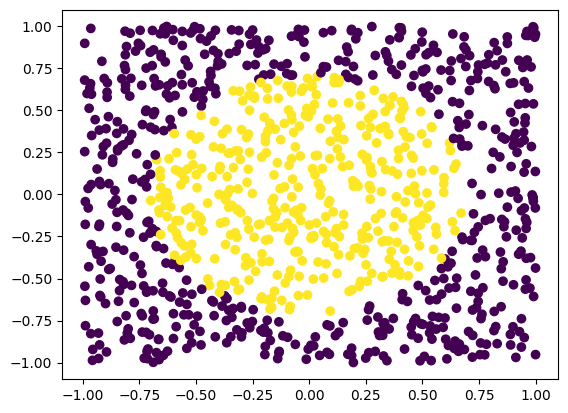

In [28]:
plt.scatter(X[:,0], X[:,1], c=y)

In [34]:
model = SVC(kernel='linear')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [39]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [43]:
y_train_pred = model.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.6053333333333333

In [44]:
y_test_pred = model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.604

In [47]:
model = SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [48]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [51]:
y_train_pred = model.predict(X_train)
print(accuracy_score(y_train, y_train_pred))
y_test_pred = model.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.6053333333333333
0.604
